This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

relu=max(0,z) and 16 here is dimension of the output of this layer .

we want to transform the input so we use activation function in deep learning so that learning is happening as it moves from one iteration to the next iteration.

logistic regression also uses optimizer to change the weights to feed back but they don't use activation function unlike deep learning.

sigmoid activation function will genaerate a value i.e. either 0 or 1.since it is a classification problem we want the output to be either 0 or 1 so we use the last layer i.e. output layer activation function as sigmoid.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),  #this is the input layer
    layers.Dense(16, activation="relu"), #this is the hidden layer
    layers.Dense(1, activation="sigmoid") #this is the output layer
])

**Compiling the model**

Here loss function takes the difference between the actual output and the predicted output and feed it to optimizer 
which is used to adjust the weights for different layers accordingly for the next iteraration in the deep learning model.

adam and rmsprop are 2 optimizer used in deep learning.
adam used to be used earlier.
rmsprop is more popular now.

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

Validation data is extremely important otherwise we will not know the optimal training capability of our model building which might lead to overfitting.

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

say we have 1000 rows of input data and we keep batch size of 500 so we will need to run training on entire data in 2 batches to comple all 1000 rows.this is what is meant by the term batch size.

Epocs are number of iteration for which the Deep learning model is being run.

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5490 - accuracy: 0.7909 - val_loss: 0.4377 - val_accuracy: 0.8630
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3528 - accuracy: 0.8997 - val_loss: 0.3337 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2555 - accuracy: 0.9235 - val_loss: 0.2900 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1979 - accuracy: 0.9375 - val_loss: 0.2752 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1564 - accuracy: 0.9510 - val_loss: 0.2898 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1258 - accuracy: 0.9629 - val_loss: 0.2895 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1047 - accuracy: 0.9697 - val_loss: 0.2961 - val_accuracy: 0.8840
Epoch 8/20
30

Normally after improving the model accuracy on validation data once the model got fitted.we should then have test data as well and we should run the built model on test data as well.

validation accuracy is the accuracy for validation data.seeing validation accuracy we should decide upto what epoch training model need to run.if validation accuracy becomes almost constant and not tend to improve we can stop training our model uptil that epochs otherwise we will be just doing overfitting.here.accuracy term denotes training accuracy and val_accuracy denotes accuracy for the validation data.

we can see from above training accuracy improved till .9998 on the last epoch but validation accuracy has started going down in the last few epochs which should not happen so we should adjust our epoch in such a way that validation accuracy for validation data should not start going down.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

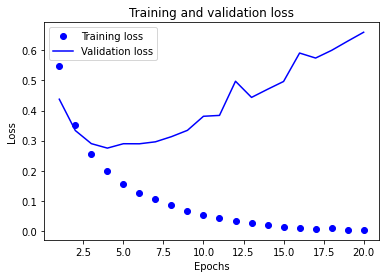

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

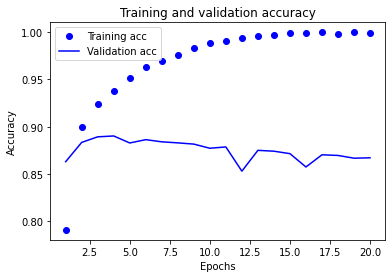

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 37ms/step - loss: 0.4669 - accuracy: 0.8174
Epoch 2/4
49/49 [==============================] - 2s 37ms/step - loss: 0.2650 - accuracy: 0.9094
Epoch 3/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2035 - accuracy: 0.9276
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3168 - accuracy: 0.8750


In [ ]:
results

[0.3167639672756195, 0.875]

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.11899298],
       [0.9985388 ],
       [0.5068133 ],
       ...,
       [0.05969061],
       [0.04193168],
       [0.36839938]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 63ms/step - loss: 2.6233 - accuracy: 0.5064 - val_loss: 1.7573 - val_accuracy: 0.6110
Epoch 2/20
16/16 [==============================] - 1s 53ms/step - loss: 1.4184 - accuracy: 0.7013 - val_loss: 1.3022 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 1s 53ms/step - loss: 1.0374 - accuracy: 0.7781 - val_loss: 1.1205 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 1s 66ms/step - loss: 0.8141 - accuracy: 0.8264 - val_loss: 1.0295 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 63ms/step - loss: 0.6518 - accuracy: 0.8638 - val_loss: 0.9911 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 1s 53ms/step - loss: 0.5245 - accuracy: 0.8915 - val_loss: 0.9186 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 53ms/step - loss: 0.4211 - accuracy: 0.9112 - val_loss: 0.9084 - val_accuracy: 0.8000
Epoch 8/20
16

**Plotting the training and validation loss**

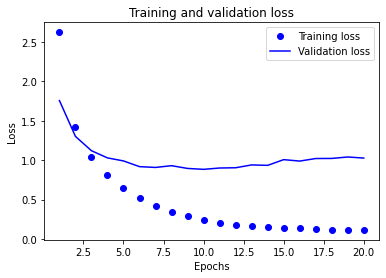

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

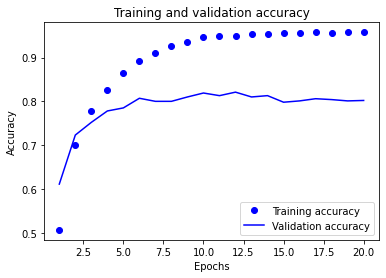

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

here,using softmax as activation function for the output layer it will generate 46 different outputs.say max output value is 
0.8 then other 45 value will all add up to 0.2

here loss function is categorical_crossentropy for calculating difference between the actual output and predicted output.

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 49ms/step - loss: 2.6078 - accuracy: 0.5416
Epoch 2/9
18/18 [==============================] - 1s 52ms/step - loss: 1.4143 - accuracy: 0.7045
Epoch 3/9
18/18 [==============================] - 1s 62ms/step - loss: 1.0255 - accuracy: 0.7796
Epoch 4/9
18/18 [==============================] - 1s 61ms/step - loss: 0.7921 - accuracy: 0.8378
Epoch 5/9
18/18 [==============================] - 1s 61ms/step - loss: 0.6260 - accuracy: 0.8735
Epoch 6/9
18/18 [==============================] - 1s 60ms/step - loss: 0.4992 - accuracy: 0.9008
Epoch 7/9
18/18 [==============================] - 1s 61ms/step - loss: 0.4023 - accuracy: 0.9185
Epoch 8/9
18/18 [==============================] - 1s 55ms/step - loss: 0.3311 - accuracy: 0.9306
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9705 - accuracy: 0.7921


In [ ]:
results

[0.970488965511322, 0.7920747995376587]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19011576135351738

### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

0.99999994

In [ ]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 27ms/step - loss: 2.9610 - accuracy: 0.3247 - val_loss: 2.1233 - val_accuracy: 0.5590
Epoch 2/20
63/63 [==============================] - 1s 19ms/step - loss: 1.7346 - accuracy: 0.5853 - val_loss: 1.5693 - val_accuracy: 0.6110
Epoch 3/20
63/63 [==============================] - 1s 19ms/step - loss: 1.3613 - accuracy: 0.6417 - val_loss: 1.4218 - val_accuracy: 0.6410
Epoch 4/20
63/63 [==============================] - 1s 20ms/step - loss: 1.1789 - accuracy: 0.6799 - val_loss: 1.3558 - val_accuracy: 0.6720
Epoch 5/20
63/63 [==============================] - 1s 22ms/step - loss: 1.0495 - accuracy: 0.7304 - val_loss: 1.3153 - val_accuracy: 0.7050
Epoch 6/20
63/63 [==============================] - 1s 19ms/step - loss: 0.9483 - accuracy: 0.7692 - val_loss: 1.3103 - val_accuracy: 0.7000
Epoch 7/20
63/63 [==============================] - 1s 23ms/step - loss: 0.8621 - accuracy: 0.7851 - val_loss: 1.2855 - val_accuracy: 0.7200
Epoch 8/20
63

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

if we have one column where values ranges from 1 to 10 and pther column where values ranges from 1 to 1000 then while training the deep learning model,converging the model or making the model learn faster becomes virtually impossible.it takes so much time because there are different ranges of values in different columns.That is one practical issue which we would face if we don't normalize the data.

Normalizing would involves subtract each values in a column by the mean and divide by standard deviation.this changes the values in a column between 0 and 1.that helps to bring values in all columns in the same range i.e. between 0 and 1.

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

we have one input layer here with activation function as relu.
we have one hidden layer with activation function as relu.

we have output layer with no activation function.it is a regression problem.we don't want probablity value for the target variable as was done in the classification problem but actual continuous value for the regression problem.that is why we don't have any activation function for the output layer.

loss function for the regression problem here is mse  which is different from the one used in classification problems.

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

here data set used has only 404 rows in training data which is very less for the deep learning model to fastly learn from the model.so in cases like these where we hae less input data we can use K-fold validation method.

**K-fold validation**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[1.974465250968933, 2.477135419845581, 2.3865106105804443, 2.447744131088257]

In [ ]:
np.mean(all_scores)

2.321463853120804

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

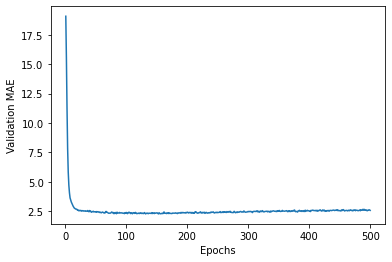

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

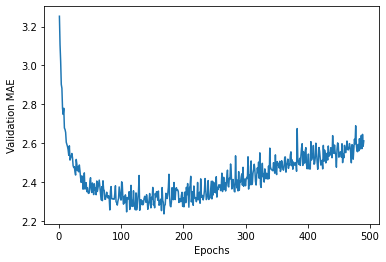

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 15.1294 - mae: 2.5645


In [ ]:
test_mae_score

2.564533233642578

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([10.4407], dtype=float32)

### Wrapping up

## Summary

In [ ]:
!jupyter nbconvert chapter04_getting_started_with_neural_networks_i.ipynb

[NbConvertApp] Converting notebook chapter04_getting_started_with_neural_networks_i.ipynb to html
[NbConvertApp] Writing 493443 bytes to chapter04_getting_started_with_neural_networks_i.html
